In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
laptop = pd.read_csv('laptop_data.csv')

In [3]:
laptop.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
laptop.shape

(1303, 12)

In [5]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
laptop.duplicated().sum()

0

In [7]:
laptop.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [8]:
laptop.drop(columns=["Unnamed: 0"],inplace=True)
laptop["Ram"] = laptop["Ram"].str.replace('GB','')
laptop["Weight"] = laptop["Weight"].str.replace('kg','')
laptop["Ram"] = laptop["Ram"].astype(int)
laptop["Weight"] = laptop["Weight"].astype(float)
laptop.rename(columns={"Ram":"Ram (GB)","Weight":"Weight (Kg)"},inplace=True)

In [9]:
laptop.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram (GB),Memory,Gpu,OpSys,Weight (Kg),Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [10]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram (GB)          1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight (Kg)       1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int32(1), object(7)
memory usage: 107.0+ KB


C:\Users\Admin\AppData\Local\Temp\ipykernel_6508\4032248244.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(laptop['Price'])


<Axes: xlabel='Price', ylabel='Density'>

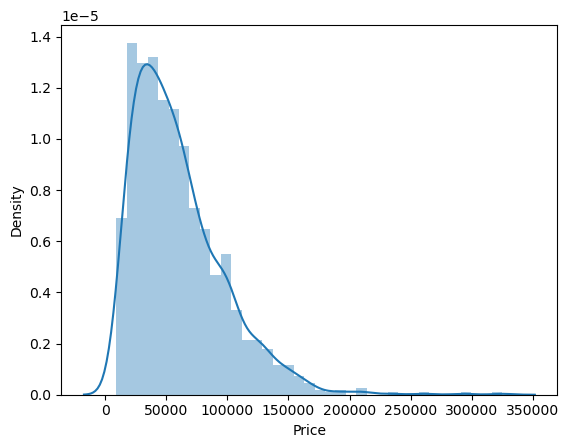

In [11]:
sns.distplot(laptop['Price'])

<Axes: xlabel='Company'>

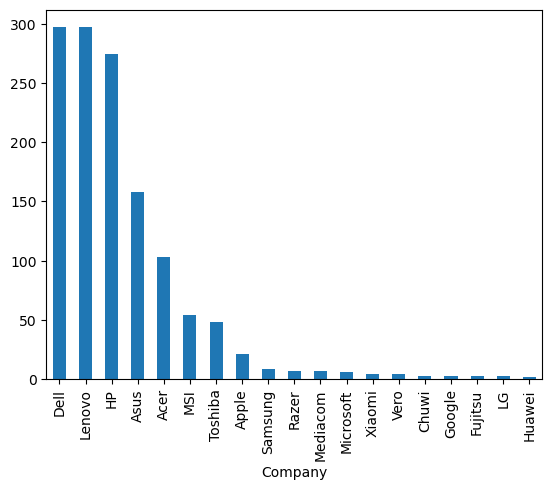

In [12]:
laptop['Company'].value_counts().plot(kind='bar')

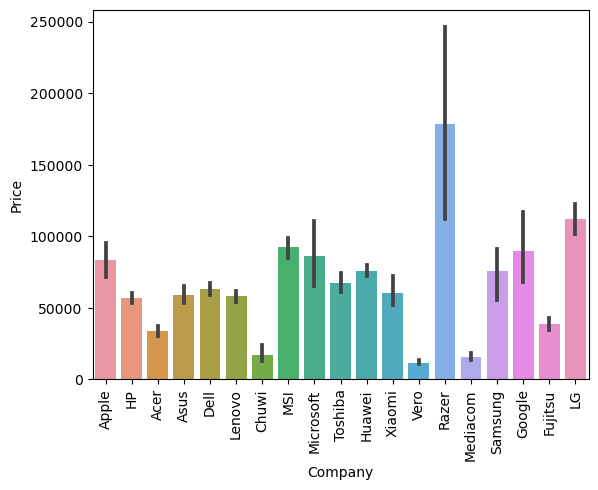

In [13]:
sns.barplot(x=laptop['Company'],y=laptop['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

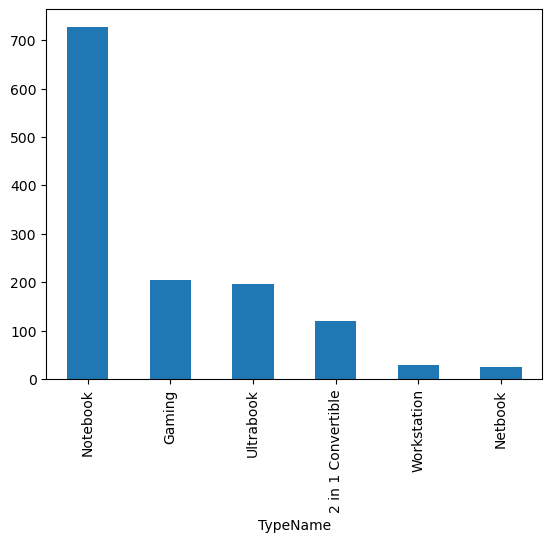

In [14]:
laptop['TypeName'].value_counts().plot(kind='bar')

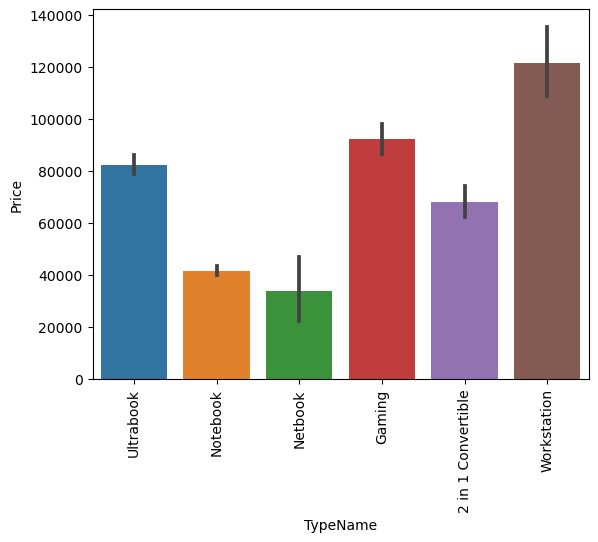

In [15]:
sns.barplot(x=laptop['TypeName'],y=laptop['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Inches', ylabel='Price'>

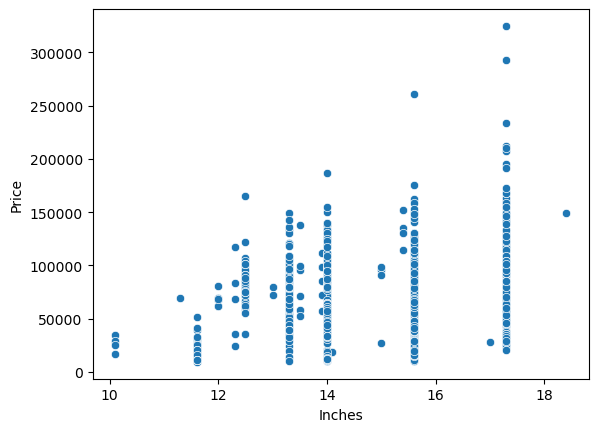

In [16]:
sns.scatterplot(x=laptop['Inches'],y=laptop['Price'])

In [17]:
laptop['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [18]:
laptop['IPS Panel'] = laptop['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
laptop['Touchscreen'] = laptop['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [19]:
laptop.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram (GB),Memory,Gpu,OpSys,Weight (Kg),Price,IPS Panel,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0


<Axes: xlabel='Touchscreen'>

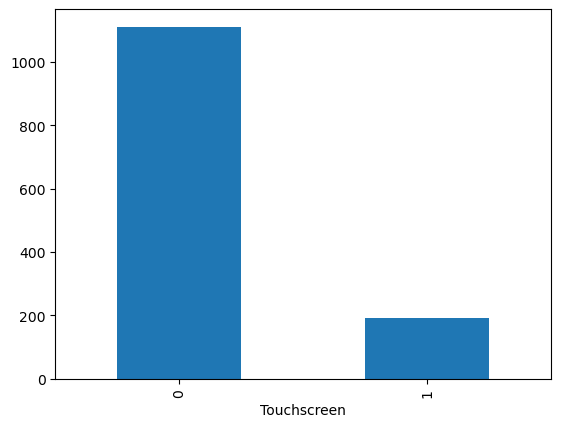

In [20]:
laptop['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

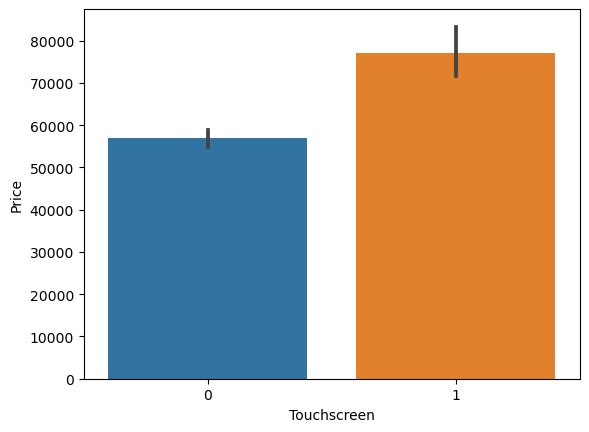

In [21]:
sns.barplot(x=laptop['Touchscreen'],y=laptop['Price'])

<Axes: xlabel='IPS Panel'>

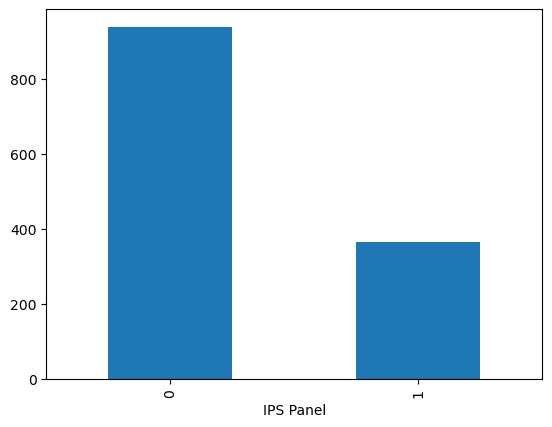

In [22]:
laptop['IPS Panel'].value_counts().plot(kind='bar')

<Axes: xlabel='IPS Panel', ylabel='Price'>

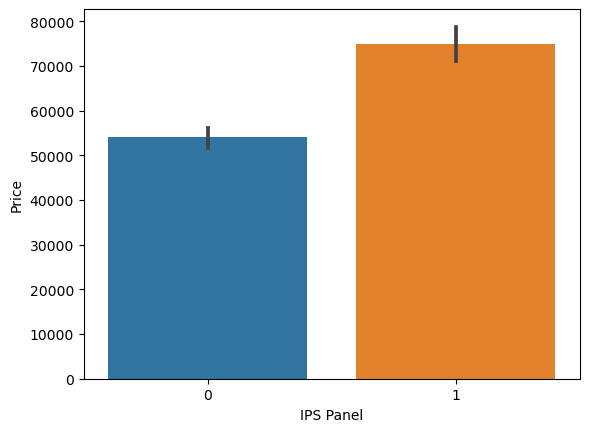

In [23]:
sns.barplot(x=laptop['IPS Panel'],y=laptop['Price'])

In [24]:
# Extract resolution using regular expression
laptop['Resolution'] = laptop['ScreenResolution'].str.extract(r'(\d+x\d+)')
laptop["Resolution_Width"] = laptop["Resolution"].str.split("x").str.get(0)
laptop["Resolution_Height"] = laptop["Resolution"].str.split("x").str.get(1)
laptop.drop(columns=["Resolution","ScreenResolution"],inplace=True)

In [25]:
laptop["Resolution_Width"] = laptop["Resolution_Width"].astype(int)
laptop["Resolution_Height"] = laptop["Resolution_Height"].astype(int)

In [26]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1303 non-null   object 
 1   TypeName           1303 non-null   object 
 2   Inches             1303 non-null   float64
 3   Cpu                1303 non-null   object 
 4   Ram (GB)           1303 non-null   int32  
 5   Memory             1303 non-null   object 
 6   Gpu                1303 non-null   object 
 7   OpSys              1303 non-null   object 
 8   Weight (Kg)        1303 non-null   float64
 9   Price              1303 non-null   float64
 10  IPS Panel          1303 non-null   int64  
 11  Touchscreen        1303 non-null   int64  
 12  Resolution_Width   1303 non-null   int32  
 13  Resolution_Height  1303 non-null   int32  
dtypes: float64(3), int32(3), int64(2), object(6)
memory usage: 127.4+ KB


In [27]:
laptop.head()

,Company,TypeName,Inches,Cpu,Ram (GB),Memory,Gpu,OpSys,Weight (Kg),Price,IPS Panel,Touchscreen,Resolution_Width,Resolution_Height
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,2560,1600
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,2880,1800
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,2560,1600


In [28]:
laptop.drop(columns=['Company','TypeName','Cpu','Memory','Gpu','OpSys']).corr()['Price']

Inches               0.068197
Ram (GB)             0.743007
Weight (Kg)          0.210370
Price                1.000000
IPS Panel            0.252208
Touchscreen          0.191226
Resolution_Width     0.556529
Resolution_Height    0.552809
Name: Price, dtype: float64

In [29]:
laptop["PPI"] = ((laptop['Resolution_Width']**2 + laptop['Resolution_Height']**2)**0.5/laptop['Inches']).astype(float)

In [30]:
laptop.head()

,Company,TypeName,Inches,Cpu,Ram (GB),Memory,Gpu,OpSys,Weight (Kg),Price,IPS Panel,Touchscreen,Resolution_Width,Resolution_Height,PPI
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,2560,1600,226.983005


In [31]:
laptop.drop(columns=['Company','TypeName','Cpu','Memory','Gpu','OpSys']).corr()['Price']

Inches               0.068197
Ram (GB)             0.743007
Weight (Kg)          0.210370
Price                1.000000
IPS Panel            0.252208
Touchscreen          0.191226
Resolution_Width     0.556529
Resolution_Height    0.552809
PPI                  0.473487
Name: Price, dtype: float64

In [32]:
laptop["Cpu"] = laptop["Cpu"].str.split().str[0:3].str.join(' ')

In [33]:
laptop.head()

,Company,TypeName,Inches,Cpu,Ram (GB),Memory,Gpu,OpSys,Weight (Kg),Price,IPS Panel,Touchscreen,Resolution_Width,Resolution_Height,PPI
0,Apple,Ultrabook,13.3,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,2560,1600,226.983005


In [34]:
def string(value):
    name = ''
    value = value.split()
    name = value[0]
    return  name

laptop["Gpu"] = laptop["Gpu"].apply(lambda x:string(x))

In [35]:
laptop.sample(5)

,Company,TypeName,Inches,Cpu,Ram (GB),Memory,Gpu,OpSys,Weight (Kg),Price,IPS Panel,Touchscreen,Resolution_Width,Resolution_Height,PPI
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7,16,512GB SSD,Intel,Windows 10,1.30,79866.7200,1,1,3200,1800,276.053530
516,HP,Notebook,15.6,Intel Core i5,4,1TB HDD,Intel,Windows 10,2.04,27783.9216,0,1,1366,768,100.454670
694,Toshiba,Notebook,13.3,Intel Core i5,8,256GB SSD,Intel,Windows 10,1.50,51841.4400,1,0,1920,1080,165.632118
503,Lenovo,Notebook,14.0,Intel Celeron Dual,4,500GB HDD,Intel,Windows 10,2.10,15930.7200,0,0,1366,768,111.935204
1179,HP,Notebook,15.6,Intel Core i3,4,500GB HDD,Intel,Windows 10,2.07,34632.0000,0,0,1366,768,100.454670


In [36]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [37]:
laptop['Cpu Brand'] = laptop['Cpu'].apply(fetch_processor)

<Axes: xlabel='Cpu Brand'>

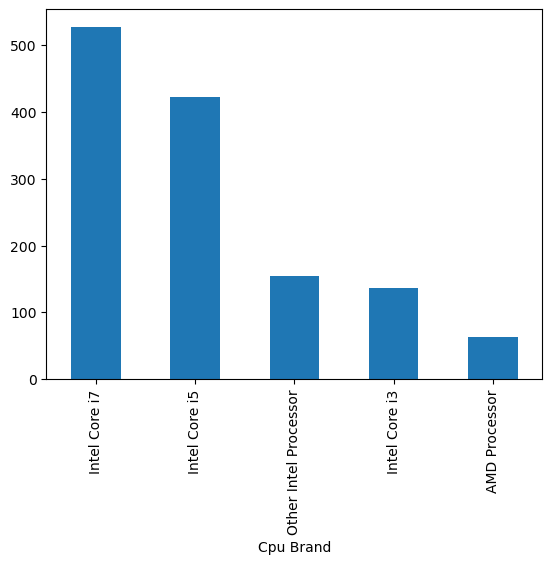

In [38]:
laptop['Cpu Brand'].value_counts().plot(kind='bar')

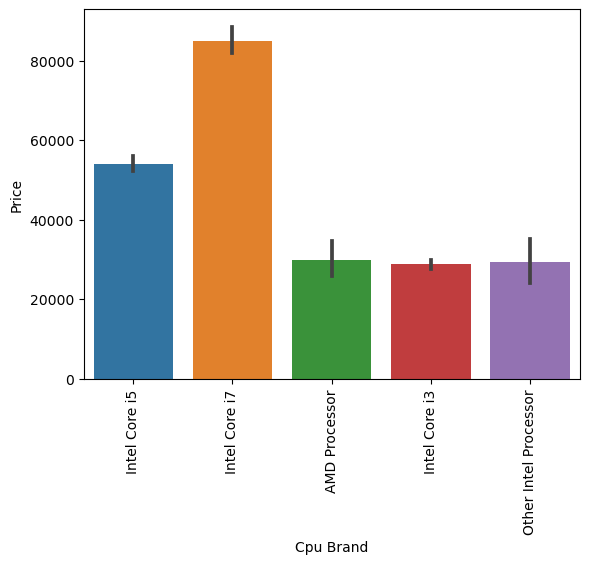

In [39]:
sns.barplot(x=laptop['Cpu Brand'], y=laptop['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [40]:
laptop.drop(columns=['Cpu'],inplace=True)

<Axes: xlabel='Gpu'>

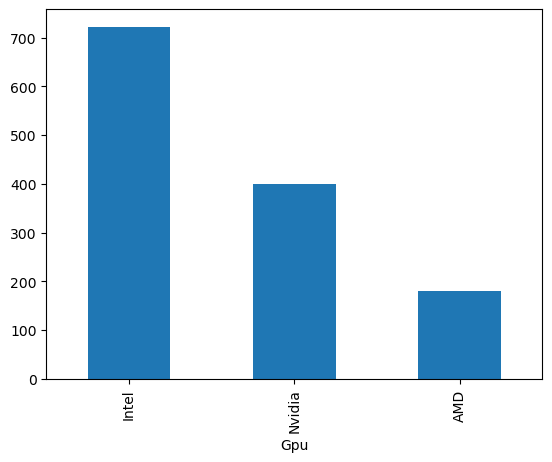

In [41]:
laptop = laptop[laptop['Gpu'] != 'ARM']
laptop['Gpu'].value_counts().plot(kind='bar')

<Axes: xlabel='Gpu', ylabel='Price'>

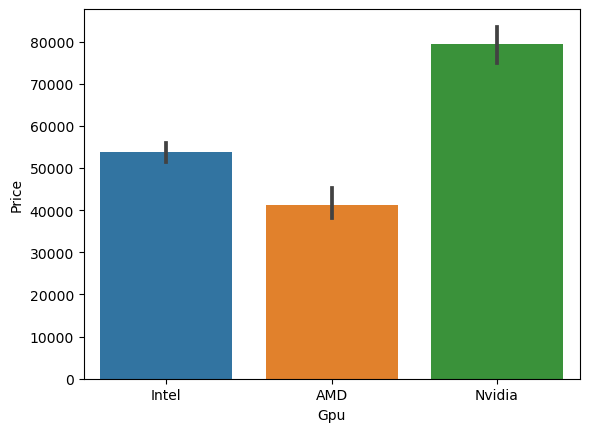

In [42]:
sns.barplot(x=laptop['Gpu'],y=laptop['Price'])

In [43]:
laptop.rename(columns={'Gpu':'Gpu Brand'},inplace=True)

In [44]:
laptop.sample(5)

,Company,TypeName,Inches,Ram (GB),Memory,Gpu Brand,OpSys,Weight (Kg),Price,IPS Panel,Touchscreen,Resolution_Width,Resolution_Height,PPI,Cpu Brand
680,MSI,Gaming,15.6,8,256GB SSD,Nvidia,Windows 10,2.20,53168.112,0,0,1920,1080,141.211998,Intel Core i5
1186,Dell,2 in 1 Convertible,15.6,16,512GB SSD,Intel,Windows 10,2.09,62817.120,0,1,1920,1080,141.211998,Intel Core i7
116,HP,Notebook,14.0,8,512GB SSD,Intel,Windows 10,1.63,57755.520,0,0,1920,1080,157.350512,Intel Core i7
367,Lenovo,Gaming,15.6,8,128GB SSD + 1TB HDD,Nvidia,No OS,2.40,43103.520,1,0,1920,1080,141.211998,Intel Core i5
76,Lenovo,Notebook,15.6,8,2TB HDD,Intel,No OS,2.20,27652.320,0,0,1920,1080,141.211998,Intel Core i5


<Axes: xlabel='Ram (GB)'>

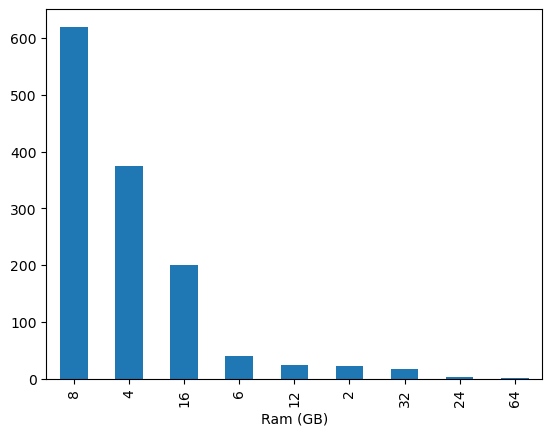

In [45]:
laptop['Ram (GB)'].value_counts().plot(kind='bar')

<Axes: xlabel='Ram (GB)', ylabel='Price'>

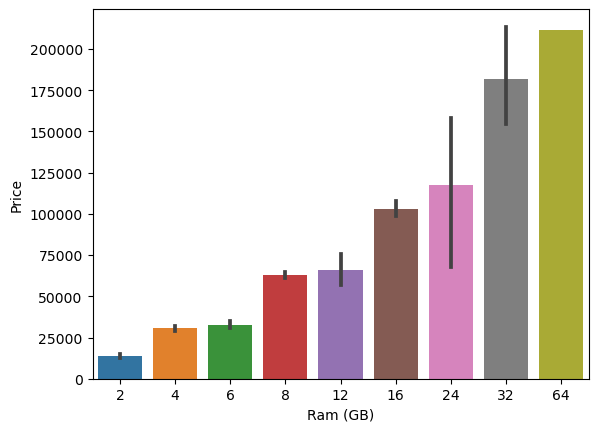

In [46]:
sns.barplot(x=laptop['Ram (GB)'],y=laptop['Price'])

In [47]:
laptop['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [48]:
ssd_pattern = r'(\d+(?:\.\d+)?GB SSD)'
hdd_pattern = r'(\d+(?:\.\d+)?TB HDD)'
flash_pattern = r'(\d+(?:\.\d+)?GB Flash Storage)'
hybrid_pattern = r'(\d+(?:\.\d+)?TB Hybrid)'

In [49]:
laptop['SSD'] = laptop['Memory'].str.extract(ssd_pattern)
laptop['HDD'] = laptop['Memory'].str.extract(hdd_pattern)
laptop['Flash Storage'] = laptop['Memory'].str.extract(flash_pattern)
laptop['Hybrid'] = laptop['Memory'].str.extract(hybrid_pattern)

In [50]:
laptop['SSD'] = laptop['SSD'].str.split(' ').str.get(0)
laptop['HDD'] = laptop['HDD'].str.split(' ').str.get(0)
laptop['Flash Storage'] = laptop['Flash Storage'].str.split(' ').str.get(0)
laptop['Hybrid'] = laptop['Hybrid'].str.split(' ').str.get(0)

In [51]:
laptop['SSD'] = laptop['SSD'].str.replace('GB',' ')
laptop['HDD'] = laptop['HDD'].str.replace('TB',' ')
laptop['HDD'] = laptop['HDD'].str.replace('GB',' ')
laptop['Flash Storage'] = laptop['Flash Storage'].str.replace('GB',' ')
laptop['Hybrid'] = laptop['Hybrid'].str.replace('GB',' ')
laptop['Hybrid'] = laptop['Hybrid'].str.replace('TB',' ')

In [52]:
laptop['SSD'].fillna(0,axis=0,inplace=True)
laptop['HDD'] = laptop['HDD'].str.replace('1','1000')
laptop['HDD'].fillna(0,axis=0,inplace=True)
laptop['Flash Storage'].fillna(0,axis=0,inplace=True)
laptop['Hybrid'] = laptop['Hybrid'].str.replace('1','1000')
laptop['Hybrid'].fillna(0,axis=0,inplace=True)

In [53]:
laptop.sample(5)

,Company,TypeName,Inches,Ram (GB),Memory,Gpu Brand,OpSys,Weight (Kg),Price,IPS Panel,Touchscreen,Resolution_Width,Resolution_Height,PPI,Cpu Brand,SSD,HDD,Flash Storage,Hybrid
1269,Asus,Notebook,15.6,4,500GB HDD,Nvidia,Windows 10,2.20,38378.6496,0,0,1366,768,100.454670,Intel Core i7,0,0,0,0
340,Dell,Notebook,15.6,4,500GB HDD,Intel,Linux,2.20,14646.6720,0,0,1366,768,100.454670,Other Intel Processor,0,0,0,0
838,Lenovo,Notebook,14.0,4,16GB Flash Storage,Intel,Chrome OS,1.50,17316.0000,0,0,1366,768,111.935204,Other Intel Processor,0,0,16,0
901,Asus,Gaming,17.3,32,256GB SSD + 256GB SSD,Nvidia,Windows 10,3.58,68145.1200,1,0,1920,1080,127.335675,Intel Core i7,256,0,0,0
651,Acer,Gaming,15.6,8,1TB HDD,Nvidia,Linux,2.40,37775.5200,0,0,1920,1080,141.211998,Intel Core i5,0,1000,0,0


In [54]:
laptop.drop(columns=['Memory','Resolution_Width','Resolution_Height'],inplace=True)

In [55]:
laptop['SSD'] = laptop['SSD'].astype(float)
laptop['HDD'] = laptop['HDD'].astype(float)
laptop['Flash Storage'] = laptop['Flash Storage'].astype(float)
laptop['Hybrid'] = laptop['Hybrid'].astype(float)

In [56]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1302 non-null   object 
 1   TypeName       1302 non-null   object 
 2   Inches         1302 non-null   float64
 3   Ram (GB)       1302 non-null   int32  
 4   Gpu Brand      1302 non-null   object 
 5   OpSys          1302 non-null   object 
 6   Weight (Kg)    1302 non-null   float64
 7   Price          1302 non-null   float64
 8   IPS Panel      1302 non-null   int64  
 9   Touchscreen    1302 non-null   int64  
 10  PPI            1302 non-null   float64
 11  Cpu Brand      1302 non-null   object 
 12  SSD            1302 non-null   float64
 13  HDD            1302 non-null   float64
 14  Flash Storage  1302 non-null   float64
 15  Hybrid         1302 non-null   float64
dtypes: float64(8), int32(1), int64(2), object(5)
memory usage: 167.8+ KB


In [57]:
laptop.drop(columns=['Company','TypeName','Cpu Brand','Gpu Brand','OpSys']).corr()['Price']

Inches           0.067329
Ram (GB)         0.742905
Weight (Kg)      0.209867
Price            1.000000
IPS Panel        0.253320
Touchscreen      0.192917
PPI              0.475368
SSD              0.552681
HDD             -0.022003
Flash Storage   -0.040067
Hybrid           0.008777
Name: Price, dtype: float64

In [58]:
laptop.drop(columns=['Flash Storage','Hybrid'],inplace=True)

In [59]:
laptop.head(5)

,Company,TypeName,Inches,Ram (GB),Gpu Brand,OpSys,Weight (Kg),Price,IPS Panel,Touchscreen,PPI,Cpu Brand,SSD,HDD
0,Apple,Ultrabook,13.3,8,Intel,macOS,1.37,71378.6832,1,0,226.983005,Intel Core i5,128.0,0.0
1,Apple,Ultrabook,13.3,8,Intel,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0.0,0.0
2,HP,Notebook,15.6,8,Intel,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256.0,0.0
3,Apple,Ultrabook,15.4,16,AMD,macOS,1.83,135195.3360,1,0,220.534624,Intel Core i7,512.0,0.0
4,Apple,Ultrabook,13.3,8,Intel,macOS,1.37,96095.8080,1,0,226.983005,Intel Core i5,256.0,0.0


In [60]:
laptop["OpSys"] = laptop["OpSys"].replace(["Windows 10","Windows 10 S","Windows 7"],"Windows")
laptop["OpSys"] = laptop["OpSys"].replace(["macOS","Mac OS X"],"Mac OS")
laptop["OpSys"] = laptop["OpSys"].replace(["Chrome OS","Android","No OS"],"Other OS")

<Axes: xlabel='OpSys'>

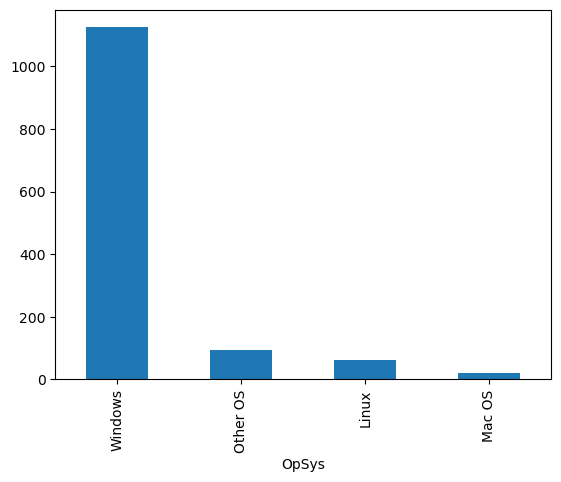

In [61]:
laptop["OpSys"].value_counts().plot(kind='bar')

<Axes: xlabel='OpSys', ylabel='Price'>

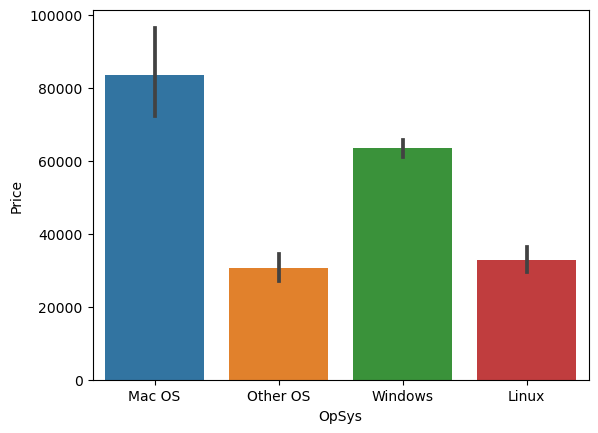

In [62]:
sns.barplot(x=laptop['OpSys'],y=laptop['Price'])

<Axes: xlabel='Weight (Kg)', ylabel='Price'>

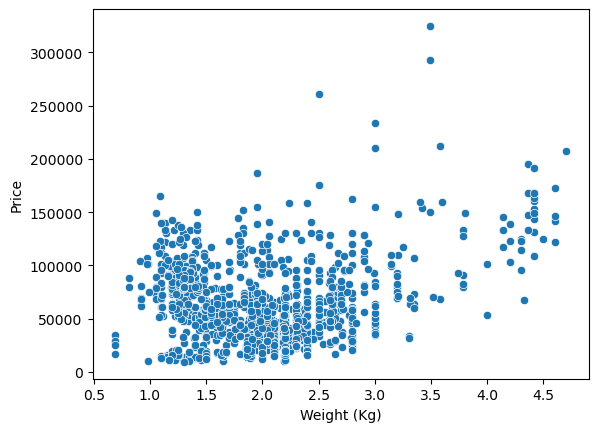

In [63]:
sns.scatterplot(x=laptop['Weight (Kg)'],y=laptop['Price'])

In [64]:
laptop.drop(columns=['Company','TypeName','Cpu Brand','Gpu Brand','OpSys']).corr()['Price']

Inches         0.067329
Ram (GB)       0.742905
Weight (Kg)    0.209867
Price          1.000000
IPS Panel      0.253320
Touchscreen    0.192917
PPI            0.475368
SSD            0.552681
HDD           -0.022003
Name: Price, dtype: float64

<Axes: >

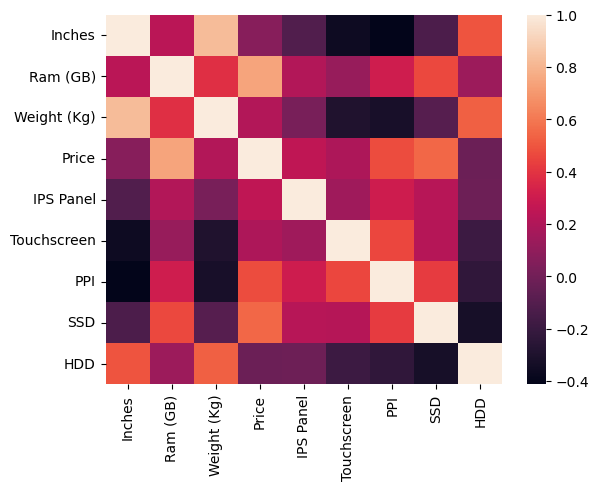

In [65]:
sns.heatmap(laptop.drop(columns=['Company','TypeName','Cpu Brand','Gpu Brand','OpSys']).corr())

C:\Users\Admin\AppData\Local\Temp\ipykernel_6508\3984844542.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(laptop['Price']))


<Axes: xlabel='Price', ylabel='Density'>

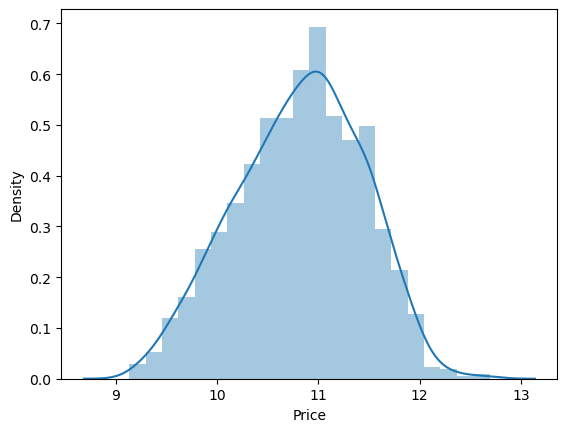

In [66]:
sns.distplot(np.log(laptop['Price']))

In [67]:
new_laptop = laptop.copy()

In [68]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [69]:
new_laptop['Company'] = encoder.fit_transform(new_laptop['Company'])
new_laptop['TypeName'] = encoder.fit_transform(new_laptop['TypeName'])
new_laptop['Gpu Brand'] = encoder.fit_transform(new_laptop['Gpu Brand'])
new_laptop['OpSys'] = encoder.fit_transform(new_laptop['OpSys'])
new_laptop['Cpu Brand'] = encoder.fit_transform(new_laptop['Cpu Brand'])

In [70]:
X = new_laptop.drop(columns=['Price'])
Y = np.log(new_laptop['Price'])

In [71]:
X

,Company,TypeName,Inches,Ram (GB),Gpu Brand,OpSys,Weight (Kg),IPS Panel,Touchscreen,PPI,Cpu Brand,SSD,HDD
0,1,4,13.3,8,1,1,1.37,1,0,226.983005,2,128.0,0.0
1,1,4,13.3,8,1,1,1.34,0,0,127.677940,2,0.0,0.0
2,7,3,15.6,8,1,2,1.86,0,0,141.211998,2,256.0,0.0
3,1,4,15.4,16,0,1,1.83,1,0,220.534624,3,512.0,0.0
4,1,4,13.3,8,1,1,1.37,1,0,226.983005,2,256.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,10,0,14.0,4,1,3,1.80,1,1,157.350512,3,128.0,0.0
1299,10,0,13.3,16,1,3,1.30,1,1,276.053530,3,512.0,0.0
1300,10,3,14.0,2,1,3,1.50,0,0,111.935204,4,0.0,0.0
1301,7,3,15.6,6,0,3,2.19,0,0,100.454670,3,0.0,1000.0


In [72]:
Y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=10)

In [74]:
print(X.shape,X_train.shape,X_test.shape)

(1302, 13) (911, 13) (391, 13)


In [75]:
X_train.sample(5)

,Company,TypeName,Inches,Ram (GB),Gpu Brand,OpSys,Weight (Kg),IPS Panel,Touchscreen,PPI,Cpu Brand,SSD,HDD
1136,7,5,17.3,8,2,3,3.00,1,0,127.335675,3,256.0,0.0
405,2,4,14.0,8,1,3,1.10,0,0,157.350512,3,512.0,0.0
252,2,3,15.6,4,0,3,1.68,0,0,100.454670,0,0.0,1000.0
914,0,3,15.6,4,1,3,2.40,0,0,141.211998,1,0.0,1000.0
4,1,4,13.3,8,1,1,1.37,1,0,226.983005,2,256.0,0.0


In [76]:
from xgboost import XGBRegressor
regressor = XGBRegressor(n_estimators=100,max_depth=5,learning_rate=0.5)
regressor.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [77]:
y_pred = regressor.predict(X_test)

In [78]:
from sklearn.metrics import mean_absolute_error,r2_score
R2_Score = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
print(f'R2_Score Value: {R2_Score}')
print(f'Mean Absolute Error: {MAE}')

R2_Score Value: 0.8848994555252458
Mean Absolute Error: 0.15974515806652417


In [79]:
laptop

,Company,TypeName,Inches,Ram (GB),Gpu Brand,OpSys,Weight (Kg),Price,IPS Panel,Touchscreen,PPI,Cpu Brand,SSD,HDD
0,Apple,Ultrabook,13.3,8,Intel,Mac OS,1.37,71378.6832,1,0,226.983005,Intel Core i5,128.0,0.0
1,Apple,Ultrabook,13.3,8,Intel,Mac OS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0.0,0.0
2,HP,Notebook,15.6,8,Intel,Other OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256.0,0.0
3,Apple,Ultrabook,15.4,16,AMD,Mac OS,1.83,135195.3360,1,0,220.534624,Intel Core i7,512.0,0.0
4,Apple,Ultrabook,13.3,8,Intel,Mac OS,1.37,96095.8080,1,0,226.983005,Intel Core i5,256.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,Intel,Windows,1.80,33992.6400,1,1,157.350512,Intel Core i7,128.0,0.0
1299,Lenovo,2 in 1 Convertible,13.3,16,Intel,Windows,1.30,79866.7200,1,1,276.053530,Intel Core i7,512.0,0.0
1300,Lenovo,Notebook,14.0,2,Intel,Windows,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0.0,0.0
1301,HP,Notebook,15.6,6,AMD,Windows,2.19,40705.9200,0,0,100.454670,Intel Core i7,0.0,1000.0


In [80]:
import pickle as pkl
pkl.dump(regressor,open('regressor.pkl','wb'))
pkl.dump(laptop,open('laptop.pkl','wb'))

### Building the Predictive System

In [81]:
X_test.iloc[214].values

array([ 10.        ,   0.        ,  14.        ,  16.        ,
         1.        ,   3.        ,   1.36      ,   0.        ,
         1.        , 209.80068286,   3.        , 512.        ,
         0.        ])

In [82]:
query = X_test.iloc[134].values

query_value = query.reshape(1,13)

In [83]:
prediction = regressor.predict(query_value)

In [84]:
print('Your prediction for the data is :',np.exp(prediction[0]))

Your prediction for the data is : 49469.12


In [85]:
np.exp(y_test.iloc[134])

52161.119999999995

In [86]:
new_laptop['Company'].unique()

array([ 1,  7,  0,  2,  4, 10,  3, 11, 13, 16,  8, 18, 17, 14, 12, 15,  6,
        5,  9])

In [87]:
laptop['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [88]:
brand_value = np.unique(laptop['Company'])
brand_value = list(brand_value)
brand_index = float(brand_value.index('Xiaomi'))
brand_index

18.0